# Get SR data

In [22]:
import pandas as pd
import numpy as np

worry_data1=pd.read_csv('../../raw_data/fs_qs.csv')
worry_data2=pd.read_csv('../../raw_data/v2_q.csv')
print('# Males={}'.format(np.sum(1*(worry_data1['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data1['Response']=='Female'))))
print('# Males={}'.format(np.sum(1*(worry_data2['Response']=='Male'))))
print('# Females={}'.format(np.sum(1*(worry_data2['Response']=='Female'))))


# Males=71
# Females=47
# Males=48
# Females=51


In [297]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

#set up variables
PSWQ_Scores=[]
MASQ_Scores=[]
OCD_Scores=[]
BDI_Scores=[]
fem_c=0
id_col='Participant External Session ID'
female_subs=[]
fem_scores=[]
male_scores=[]
bad_subject_ids=['5dda7c406ca7e79e02235371', '5dda8380eb39739cfc403842', '5dda8e6dcb9dd69ea446e804', '5dda93bae08a369e6b41008c', '5dda9c76a4aa269ede527974', '5dda9dd2ce1ce6a0d707441e', '5ddab422dfe9daa1283552b3', '5ddabc6f270f44a124b3624d', '5ddac0201e70daa279ed1d94', '5ddac87035cf74a225b91705', '5ddaca49caee3ea19e2ca4c7', '5ddacbacade462a226666fbb', '5ddad2ebbca2e4a292a7c966', '5ddad8c4961cb3a3a68885ac', '5ddae010326992a384c62f86', '5ddaece71f179ea3c10b2974', '5ddaf37659b1b0a5228f81f6', '5ddafda78f45b9a5df1fe637', '5ddb440f7beb29a9eb4425cf', '5ddb89aeecd14cacddf5b50e', '5ddbac7d9d9e30aec47b22e9', '5ddbb86cb98887b06c587843', '5ddd77bfa46eb3000cb0a64b', '5ddd80d2bca2e4cdd2516929', '5ddd84756d5225cf5f5c8e05', '5ddd8fbd1c219bcfe0aca31f', '5dde7cda2a30acde50c7566a', '5dde7ec68ed6bfddbeb894d3', '5dde8036eb3973dd61d50310', '5dde87529eb3a1000afcb64e', '5dde938de73e61de07e3da38', '5dde9d84b48da3df06773880', '5ddea25cd69072e15ce9bba5', '5ddeacb3393bd3e08a95fd4f', '5ddec06183e309e42df65e25', '5ddec342ff36d7000c7832b6', '5ddecacca4c372000afe28c3', '5dded5007d4595e47e60dc8b', '5ddedb34794e10e459f0e9f6', '5ddee5121e70dae5cc9a7e1c', '5ddf02497d4595e72446c67f', '5ddf4ecbfd5b28ebe2bd0066', '5ddf69b5f83c9fec8fbeee6c', '5ddfd201762dc203e81fd70b']
print('len bad subs: {}'.format(len(bad_subject_ids)))

reverse_scored=[1,3,8,10,11]
rs_dict={1:5,2:4,3:3,4:2,5:1}
current_score=0
MASQ_score=0.0
OCD_score=0.0
BDI_score=0.0

#question counters each questionnaire
a=0
b=0
w=0
o=0


reverse_score_counter=0
counter=0
IDs=['Holder']
sc=-1
#get row locations where PSWQ items are
ilocs=[]

#check if they faithfully filled out the questionnaire
rs_items=[]
non_rs_items=[]
sub=1
c_id=1
for vers in range(2):
    if vers==0:
        worry_data=worry_data1
        final_row=17372
    else:
        worry_data=worry_data2
        final_row=14598
        
    for row,data in worry_data.iterrows():
        
        if worry_data['Response'][row]=='Female':
            current_sub_id=worry_data[id_col][row]
            if current_sub_id not in bad_subject_ids: 
                female_subs.append(worry_data[id_col][row])
            fem_c+=1
        elif worry_data['Response'][row]=='Male':
            current_sub_id=worry_data[id_col][row]
            
        if str(worry_data['Question Key'][row])=='BEGIN QUESTIONNAIRE' or row==final_row:
#             if w<16:
#                 print(worry_data[id_col][row])
#                 print(current_score)
#                 print('worry counter={}'.format(w))
            if o<18:
                print('OCD counter={}'.format(o))
#             if a<10:
#                 print('MASQ counter={}'.format(a))
#             if b<21:
#                 print('BDI counter={}'.format(b))
            sc+=1

            if row!=0:
                if current_sub_id not in bad_subject_ids:
                    PSWQ_Scores.append(current_score)
                    if fem_c==1:
                        fem_scores.append(current_score)
                    else:
                        male_scores.append(current_score)
                    MASQ_Scores.append(MASQ_score)
                    OCD_Scores.append(OCD_score)
                    BDI_Scores.append(BDI_score)
                    if str(worry_data[id_col][row-5])!=IDs[c_id-1]:
                        IDs.append(str(worry_data[id_col][row-5]))
                    c_id+=1
                    
                if current_score==0:
                    print(str(worry_data[id_col][row-5]))
                
            current_score=0
            MASQ_score=0
            OCD_score=0
            BDI_score=0
            w=0
            b=0
            a=0
            o=0
            reverse_score_counter=0
            counter=0
    #         print('\n Reverse_Score_Check for Subject {}'.format(sub))
    #         print('RS avg: {}'.format(np.mean(rs_items)))
    #         print('NON RS avg: {}'.format(np.mean(non_rs_items)))
    #         print('\n')
            sub+=1
            rs_items=[]
            non_rs_items=[]
            fem_c=0


        elif str(worry_data['Question Key'][row]).startswith('ps') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            if len(worry_data['Question Key'][row])>5:
                if int(worry_data['Question Key'][row][-2:]) in reverse_scored:
                    rs_items.append(int(worry_data['Response'][row]))
                    current_score+=rs_dict[int(worry_data['Response'][row])]
                    counter+=1
                    w+=1
                    reverse_score_counter+=1
                    ilocs.append(row)
                else:
                    non_rs_items.append(int(worry_data['Response'][row]))
                    current_score+=int(worry_data['Response'][row])
                    w+=1
                    counter+=1
                    ilocs.append(row)
            else:
                if int(worry_data['Question Key'][row][-1]) in reverse_scored:
                    rs_items.append(int(worry_data['Response'][row]))
                    current_score+=rs_dict[int(worry_data['Response'][row])]
                    counter+=1
                    w+=1
                    reverse_score_counter+=1
                    ilocs.append(row)
                else:
                    current_score+=int(worry_data['Response'][row])
                    non_rs_items.append(int(worry_data['Response'][row]))
                    counter+=1
                    w+=1
                    ilocs.append(row)
        elif str(worry_data['Question Key'][row]).startswith('response-2') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            OCD_score+=int(worry_data['Response'][row])
            o+=1
        elif str(worry_data['Question Key'][row]).startswith('response-3') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            OCD_score+=int(worry_data['Response'][row])
            o+=1
        elif str(worry_data['Question Key'][row]).startswith('bdi') and str(worry_data['Question Key'][row]).endswith('quantised'):
            BDI_score+=int(worry_data['Response'][row])
            b+=1
        elif len(str(worry_data['Question Key'][row]))>10:
            if str(worry_data['Question Key'][row]).startswith('response-1') and not str(worry_data['Question Key'][row]).endswith('quantised'):
                MASQ_score+=int(worry_data['Response'][row])
                a+=1
        elif str(worry_data['Question Key'][row]).startswith('response-9') and not str(worry_data['Question Key'][row]).endswith('quantised'):
            MASQ_score+=int(worry_data['Response'][row])
            a+=1
        
        


print('# of subs = {}'.format(len(PSWQ_Scores)))
del IDs[0]

print('mean female worry: {}'.format(np.mean(fem_scores)))
print(len(fem_scores))
print('mean male worry: {}'.format(np.mean(male_scores)))
print(ttest_ind(fem_scores,male_scores,equal_var=False))
print(len(IDs))


len bad subs: 44
OCD counter=0
OCD counter=0
# of subs = 174
mean female worry: 58.74418604651163
86
mean male worry: 52.70454545454545
Ttest_indResult(statistic=3.1713442200876885, pvalue=0.0018159666393214714)
174


# Get Choice data

In [358]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
#load  in data and just consider columsn of importance for analysis
df_task1=pd.read_csv('../../raw_data/full_images_v1.csv')
df_task2=pd.read_csv('../../raw_data/full_images_v2.csv')

# worry_scores=np.load('worry_scores.npy')

df_task_v1=df_task1[['Participant External Session ID','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]

df_task_v2=df_task2[['Participant External Session ID','Participant Public ID','Correct','display','forced_choice','forced_choice_response','Response','image2','test_image1', 
                   'test_image2','distractor_key','distractor','Reaction Time']]



female_subs=['5dda763afef7c29d76b5ebb8', '5dda79617aa0d69e616b1fd1', '5dda85f5f85b509daef88e08', '5dda85e28f45b99cd6c3ba28', '5dda98fea9ead09f2fe610b2', '5dda9f88eb39739eee1bb7b1', '5ddaa1b1954d199f6cb79e4e', '5ddaa1a441fb3f9eff92b44a', '5ddac845f290e7a167aa6b35', '5ddace63cf8e7ea2a5b029ac', '5ddad1781b28c0a2ff8cd077', '5ddadd504b0e0ca3462ef32f', '5ddb22557b6a66a90588fac8', '5ddb25137beb29a882334a35', '5ddb2d202c5c10a9417503c9', '5ddbce8ce4bf20affd419e07', '5ddbe185c23e0db210d1689c', '5ddd92c08ed6bfd0661bedba', '5ddd9844149f53d1a9d5dc9a', '5ddda6d9f83c9fd1d17d48d3', '5dddabe4eb3973d0fb933b5c', '5dddb4dfe454cdd2e599d03e', '5dddff2651db1cd7671e6791', '5dde0cbddeb756d7f3cfa83b', '5ddec6822f07fc000b932f00', '5ddecf39a4aa26f833f57e23', '5ddf0552dba634e86048e426', '5ddfba42d6406b02cdb10dfd']
select_participants=[]
nude='Fireworks 2.jpg'
IDs_removed=[]
best_subs=[]
bss=[]
correct_answer_dict={}
subs_to_remove_sr=[]
#best answers per condition: lists
rt1=[]
rto=[]
rtf=[]
rp1=[]
rpf=[]
rpo=[]
cp1=[]
cpf=[]
cpo=[]
n2=[]
n2f=[]
n2o=[]
ct1=[]
ctf=[]
cto=[]
n1_pos=[]
n1_neg=[]
n1f=[]
n1o=[]
cs=0
img_p=[]

fif_row=1
missing=0
acceptable_answers=['1','0',1,0]
all_sub_IDs=[]
value_differential=[]
miss_subs=[]
#best actions taken per order of condition
o1=[]
o2=[]
o3=[]
o4=[]
o5=[]
o6=[]
#subject specific data
rt_sub=[]
ct_sub=[]
rp_sub=[]
cp_sub=[]
neut2_sub=[]
neut1_sub=[]
#first selection fifty round
first_selection=0
missing_data=0
current_subject=0
worry_scores_bad_rt1=[]
worry_scores_good_rt1=[]
t_counter=0
current_acceptable=0
n_count=0
sub_counter=0
choice_data=np.zeros((174,5)) #to be populated below
for version in range(2):
    if version==0:
        df_task_r=df_task_v1
        print(df_task_r.shape)

    if version==1:
        df_task_r=df_task_v2
        print(df_task_r.shape)

        
    temp_row=[]
    ni=0
    counter=0
    conditions=[]
    best_action_tally=0
    condition_counter=0
    temp_dict={}
    
    current_choice_data=[]
    guesses=0
    good_subs=0
    tot_test=0
    common_consecutive_zero=0
    common_consecutive_one=0
    times_action=0
    for row,data in df_task_r.iterrows():
        
        #check if participant is elgibile from rule-out question
        if df_task_r['display'][row]=='practice_rest':
            if df_task_r['Response'][row] in acceptable_answers:
                if int(df_task_r['Correct'][row])==1:
                    current_acceptable=1
                    

        if 'rarest' in str(df_task_r['distractor_key'][row]):
            fifty_image=df_task_r['image2'][row]
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
                
      
        elif 'rare.' in str(df_task_r['distractor_key'][row]):
            
            
            if str(df_task_r['display'][row])=='fifty':
                test_thresh=4
            else:
                test_thresh=6
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
        elif 'common' in str(df_task_r['distractor_key'][row]):
            if df_task_r['distractor'][row]==nude:
                select_image=1
            
            if df_task_r['Response'][row] in acceptable_answers:
                times_action+=1
            if df_task_r['forced_choice_response'][row]==0:
                if common_consecutive_zero==0:
                    common_consecutive_zero+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_zero+=1
                    current_row=row
                else:
                    common_consecutive_zero=0
            
            elif int(df_task_r['forced_choice_response'][row])==1:
                if common_consecutive_one==0:
                    common_consecutive_one+=1
                    current_row=row
                elif row == current_row+1:
                    common_consecutive_one+=1
                    current_row=row
                else:
                    common_consecutive_one=0
                                                                               
        elif str(df_task_r['display'][row]).startswith('test'):

            if counter==0:
                counter+=1
            
            t_counter+=1
            
            if str(df_task_r['display'][row][5:])=='fifty':
                if df_task_r['Response'][row] in acceptable_answers:
                    best_action_tally+=int(df_task_r['Correct'][row])
                    current_choice_data.append(int(df_task_r['Correct'][row]))
            
            
            else:
                if str(df_task_r['test_image1'][row]) != fifty_image:
                    if df_task_r['Response'][row] in acceptable_answers:
                        best_action_tally+=int(df_task_r['Correct'][row])
                        current_choice_data.append(int(df_task_r['Correct'][row]))
                    
                else:
                    if fif_row==1:
                        if df_task_r['Response'][row] in acceptable_answers:
                            n_count+=int(df_task_r['Correct'][row])
                        else:
                            missing=1
                        fif_row+=1




            if t_counter==test_thresh:
                
                condition_counter+=1
                conditions.append(df_task_r['display'][row][5:])
                if conditions[counter-1]!='fifty':
                    if best_action_tally<2:
                        best_action_tally=0
                    else:
                        best_action_tally=1
                     


                if np.sum(current_choice_data)==2:
                    current_choice_data=[1]
                else:
                    current_choice_data=[0]

                #exclude bad subjects who have high rate of rejection in Prolific
                if df_task_r['Participant External Session ID'][row] in female_subs:
                    if conditions[counter-1]=='rare_threat_1':
                        if current_acceptable==1:
                            rt1.append(best_action_tally)
                            choice_data[sub_counter,4]=best_action_tally
                            rt_sub=current_choice_data
                            rto.append(condition_counter)
                            if missing!=1:
                                rtf.append(n_count)
                        else:
                            IDs_removed.append(df_task_r['Participant External Session ID'][row])
                            



                    elif conditions[counter-1]=='rare_positive_1':

                        if current_acceptable==1:                     
                            rp1.append(best_action_tally)
                            choice_data[sub_counter,3]=best_action_tally
                            rp_sub=current_choice_data
                            rpo.append(condition_counter)
                            if missing!=1:
                                rpf.append(n_count)

                    elif conditions[counter-1]=='common_positive_1':

                        if current_acceptable==1:

                            cp1.append(best_action_tally)
                            choice_data[sub_counter,1]=best_action_tally
                            cp_sub=current_choice_data
                            cpo.append(condition_counter)
                            if missing!=1:
                                cpf.append(n_count)

                    elif conditions[counter-1]=='fifty':
                        if current_acceptable==1:
                            if version==0:
                                n1_pos.append(best_action_tally)
                            else:
                                n1_neg.append(best_action_tally)
                        neut1_sub=current_choice_data
               

                    elif conditions[counter-1]=='common_threat_1':
                        if current_acceptable==1:
                            ct1.append(best_action_tally)
                            choice_data[sub_counter,2]=best_action_tally
                            ct_sub=current_choice_data
                            cto.append(condition_counter)
                            if missing!=1:
                                ctf.append(n_count)

                    elif conditions[counter-1]=='neutral_2':

                        if current_acceptable==1:
                            n2.append(best_action_tally)
                            choice_data[sub_counter,0]=best_action_tally
                            neut2_sub=current_choice_data
                            n2o.append(condition_counter)
                            if missing!=1:
                                n2f.append(n_count)

                else:
                    x='placeholder'
#                         print(df_task_r['Participant External Session ID'][row])

                counter+=1
                missing=0
                fif_row=1
                t_counter=0
                best_action_tally=0
                n_count=0
                cs=0
                skip=0
                tot_test=0
                current_choice_data=[]
                skip_sub=0
                first_selection=0
                ni=0
                if condition_counter==6:
                    
                    condition_counter=0
                    rt_sub=[]
                    ct_sub=[]
                    rp_sub=[]
                    cp_sub=[]
                    neut2_sub=[]
                    neut1_sub=[]
                    guesses=0
                    
                    
                        
                    if current_acceptable!=1:
                        bad='here'
                    else:
                        if select_image==1:
                            select_participants.append(df_task_r['Participant External Session ID'][row])
                        if np.array_equal(choice_data[sub_counter],[1,1,1,1,1]):
                            subs_to_remove_sr.append(current_subject)
                        all_sub_IDs.append(df_task_r['Participant External Session ID'][row])
#                         if df_task_r['Participant External Session ID'][row] not in female_subs:
#                             subs_to_remove_sr.append(current_subject)
                        if df_task_r['Participant External Session ID'][row] in female_subs:
                            sub_counter+=1
                        current_subject+=1
                    current_acceptable=0
                    select_image=0
                    
#                     print(current_subject)



order_data=[]
num_equal=0
#Order of PSWQ scores relative to Choice data entries
for subj in all_sub_IDs:
    if subj not in IDs:
        print('missing subject in questionnaire data: {}'.format(subj))
    counter=0
    for s in IDs:
        if subj==s:
            order_data.append(counter)
            num_equal+=1
        counter+=1
    

# print('current_subject: {}'.format(current_subject))
choice_data = choice_data.astype(int)
#Put SR in order of choice data and remove bad subjects
# PSWQ_Scores_Ordered=[PSWQ_Scores[i] for i in order_data]
# MASQ_Ordered=[MASQ_Scores[i] for i in order_data]
# OCD_Ordered=[OCD_Scores[i] for i in order_data]
# BDI_Ordered=[BDI_Scores[i] for i in order_data]
# PSWQ_cleaned_ordered=np.delete(PSWQ_Scores_Ordered,(subs_to_remove_sr),axis=0)
# MASQ_cleaned_ordered=np.delete(MASQ_Ordered,(subs_to_remove_sr),axis=0)
# BDI_cleaned_ordered=np.delete(BDI_Ordered,(subs_to_remove_sr),axis=0)
# OCD_cleaned_ordered=np.delete(OCD_Ordered,(subs_to_remove_sr),axis=0)

# ct1=np.delete(ct1,(subs_to_remove_sr),axis=0)
# rt1=np.delete(rt1,(subs_to_remove_sr),axis=0)
# cp1=np.delete(cp1,(subs_to_remove_sr),axis=0)
# rp1=np.delete(rp1,(subs_to_remove_sr),axis=0)
# n2=np.delete(n2,(subs_to_remove_sr),axis=0)


print('subs to remove length: {}'.format(len(subs_to_remove_sr)))

# print(len(PSWQ_cleaned_ordered))
# np.save('choice_data_binned',choice_data)
# np.save('PSWQ_cleaned_ordered_male',PSWQ_cleaned_ordered)
# np.save('MASQ_cleaned_ordered_male',MASQ_cleaned_ordered)
# np.save('BDI_cleaned_ordered_male',BDI_cleaned_ordered)
# np.save('OCD_cleaned_ordered_male',OCD_cleaned_ordered)



# IDs_ordered=[IDs[i] for i in order_data]
print('DONE') 
print(select_participants)

(75325, 13)
(63840, 13)
subs to remove length: 11
DONE
['5dda763afef7c29d76b5ebb8', '5dda79617aa0d69e616b1fd1', '5dda85f5f85b509daef88e08', '5dda85e28f45b99cd6c3ba28', '5dda98fea9ead09f2fe610b2', '5dda9f88eb39739eee1bb7b1', '5ddaa1b1954d199f6cb79e4e', '5ddaa1a441fb3f9eff92b44a', '5ddac845f290e7a167aa6b35', '5ddace63cf8e7ea2a5b029ac', '5ddad1781b28c0a2ff8cd077', '5ddadd504b0e0ca3462ef32f', '5ddb22557b6a66a90588fac8', '5ddb25137beb29a882334a35', '5ddb2d202c5c10a9417503c9', '5ddbce8ce4bf20affd419e07', '5ddbe185c23e0db210d1689c', '5ddd92c08ed6bfd0661bedba', '5ddd9844149f53d1a9d5dc9a', '5ddda6d9f83c9fd1d17d48d3', '5dddabe4eb3973d0fb933b5c', '5dddb4dfe454cdd2e599d03e', '5dddff2651db1cd7671e6791', '5dde0cbddeb756d7f3cfa83b', '5ddec6822f07fc000b932f00', '5ddecf39a4aa26f833f57e23', '5ddf0552dba634e86048e426', '5ddfba42d6406b02cdb10dfd']


# Order effects

In [ ]:
#                     if len(current_choice_data)<2:
#                         missing_data+=1
#                     if current_acceptable==1:
#                         if condition_counter==1:
#                             o1.append(best_action_tally)
#                         elif condition_counter==2:
#                             o2.append(best_action_tally)
#                         elif condition_counter==3:
#                             o3.append(best_action_tally)
#                         elif condition_counter==4:
#                             o4.append(best_action_tally)
#                         elif condition_counter==5:
#                             o5.append(best_action_tally)
#                         elif condition_counter==6:
#                             o6.append(best_action_tally)

# print('cp1 mean order {}'.format(np.mean(cpo))) 
# unique, counts = numpy.unique(cpo, return_counts=True)
# print(dict(zip(unique, counts)))
# print('\n')

# print('ct1 mean order {}'.format(np.mean(cto))) 
# unique, counts = numpy.unique(cto, return_counts=True)
# print(dict(zip(unique, counts)))
# print('\n')

# print('rp1 mean order {}'.format(np.mean(rpo))) 
# unique, counts = numpy.unique(rpo, return_counts=True)
# print(dict(zip(unique, counts)))
# print('\n')

# print('rt1 mean order {}'.format(np.mean(rto))) 
# unique, counts = numpy.unique(cpo, return_counts=True)
# print(dict(zip(unique, counts)))
# print('\n')

# print('n2 mean order {}'.format(np.mean(n2o))) 
# unique, counts = numpy.unique(n2o, return_counts=True)
# print(dict(zip(unique, counts)))
# print('\n')

# print('missing data {}'.format(missing_data))
# print(len(o1))
# print('o1 mean {}\n'.format(np.mean(o1)))
# print(len(o2))
# print('o2 mean {}\n'.format(np.mean(o2)))  
# print(len(o3))
# print('o3 mean {}\n'.format(np.mean(o3)))
# print(len(o4))
# print('o4 mean {}\n'.format(np.mean(o4))) 
# print(len(o5))
# print('o5 mean {}\n'.format(np.mean(o5))) 
# print(len(o6))
# print('o6 mean {}\n'.format(np.mean(o6)))                     
                               
                                  

# Visualize distributions

50-50 bias positive 1.0588235294117647
length: 17
{0: 3, 1: 10, 2: 4}


50-50 bias negative 0.9090909090909091
length: 11
{0: 4, 1: 4, 2: 3}


neutral IMAGES mean 0.6428571428571429
length: 28
{0: 10, 1: 18}


common positive mean 0.6428571428571429
length: 28
{0: 10, 1: 18}


common threat mean 0.7142857142857143
length: 28
{0: 8, 1: 20}


rare positive mean 0.7142857142857143
length: 28
{0: 8, 1: 20}


rare threat mean 0.7857142857142857
length: 28
{0: 6, 1: 22}




FIFTY CONDITIONS:
common threat fifty mean 0.39285714285714285
{0: 17, 1: 11}


common positive fifty mean 0.5
{0: 14, 1: 14}


rare positive fifty mean 0.5925925925925926
{0: 11, 1: 16}


rare threat fifty mean 0.42857142857142855
{0: 16, 1: 12}


neutral fifty mean 0.4444444444444444
{0: 15, 1: 12}




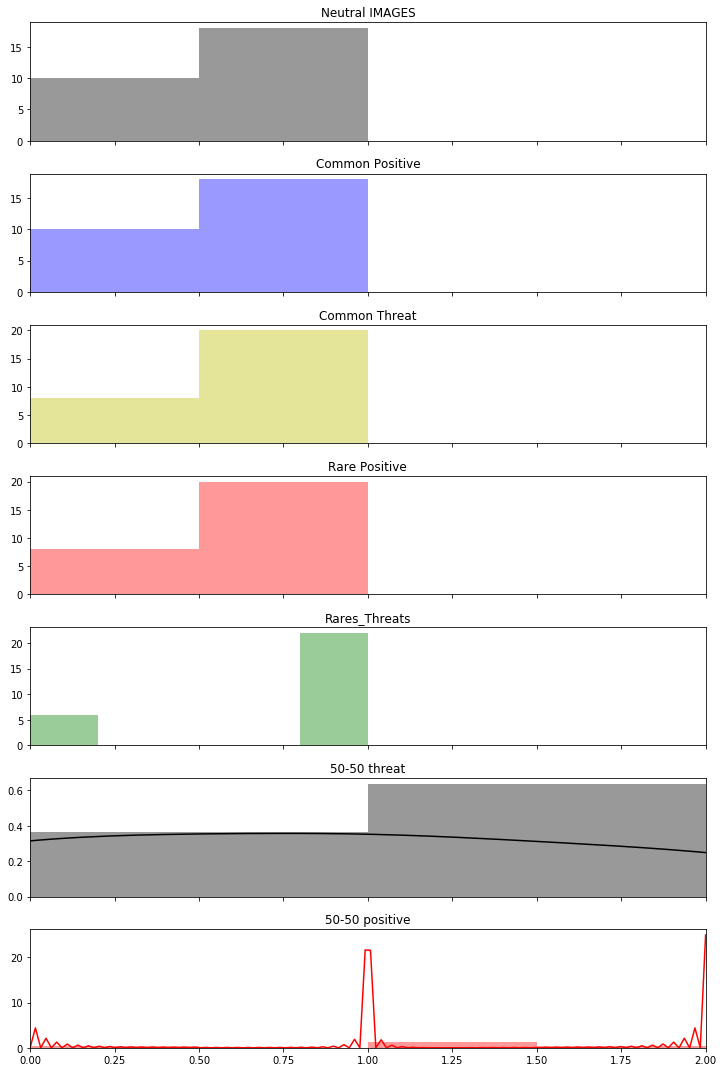

In [359]:
import matplotlib.pyplot as plt
import seaborn as sns
from bayesian_bootstrap.bootstrap import mean, highest_density_interval
import pandas as pd
from scipy.stats import mode, ttest_rel
from scipy.stats import mode, ttest_1samp as t1
import numpy


print('50-50 bias positive {}'.format(np.mean(n1_pos)))
print('length: {}'.format(len(n1_pos)))
# 
unique, counts = numpy.unique(n1_pos, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('50-50 bias negative {}'.format(np.mean(n1_neg)))
print('length: {}'.format(len(n1_neg)))
# 
unique, counts = numpy.unique(n1_neg, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


print('neutral IMAGES mean {}'.format(np.mean(n2)))
print('length: {}'.format(len(n2)))
unique, counts = numpy.unique(n2, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive mean {}'.format(np.mean(cp1)))
print('length: {}'.format(len(cp1)))
unique, counts = numpy.unique(cp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common threat mean {}'.format(np.mean(ct1)))
print('length: {}'.format(len(ct1)))
unique, counts = numpy.unique(ct1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive mean {}'.format(np.mean(rp1)))
print('length: {}'.format(len(rp1)))
unique, counts = numpy.unique(rp1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat mean {}'.format(np.mean(rt1)))
print('length: {}'.format(len(rt1)))
unique, counts = numpy.unique(rt1, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')
print('\n')

print('FIFTY CONDITIONS:')
print('common threat fifty mean {}'.format(np.mean(ctf)))
unique, counts = numpy.unique(ctf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('common positive fifty mean {}'.format(np.mean(cpf)))
unique, counts = numpy.unique(cpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare positive fifty mean {}'.format(np.mean(rpf)))
unique, counts = numpy.unique(rpf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('rare threat fifty mean {}'.format(np.mean(rtf)))
unique, counts = numpy.unique(rtf, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')

print('neutral fifty mean {}'.format(np.mean(n2f)))
unique, counts = numpy.unique(n2f, return_counts=True)
print(dict(zip(unique, counts)))
print('\n')


#graph distributions
f, axs = plt.subplots(7, 1, figsize=(10, 15),sharex=True)

ax0=sns.distplot(n2, hist=True,kde=False,color="k", ax=axs[0])
ax0.set(title='Neutral IMAGES',xlabel='')

ax1=sns.distplot(cp1, hist=True,kde=False,color="b", ax=axs[1])
ax1.set(title='Common Positive',xlabel='')

ax2=sns.distplot(ct1, hist=True,kde=False,color="y", ax=axs[2])
ax2.set(title='Common Threat',xlabel='')

ax3=sns.distplot(rp1, hist=True,kde=False,color="r", ax=axs[3])
ax3.set(title='Rare Positive',xlabel='')

ax4=sns.distplot(rt1, hist=True,kde=False,color="g", ax=axs[4])
ax4.set(title='Rares_Threats',xlabel='')

ax4=sns.distplot(n1_neg, hist=True,color="k", ax=axs[5])
ax4.set(title='50-50 threat',xlabel='')

ax4=sns.distplot(n1_pos, hist=True,color="r", ax=axs[6])
ax4.set(title='50-50 positive',xlabel='')

# ax4=sns.distplot(n1, hist=True,kde=False,color="k", ax=axs[5])
# ax4.set(title='neutral fifty',xlabel='')

plt.tight_layout()
plt.xlim(0, 2)
plt.show()



In [331]:
from scipy.stats import spearmanr as corrS
from scipy.stats import ttest_ind
from scipy.stats import ttest_1samp

worry_data_male=np.load('OCD_cleaned_ordered_female.npy')
print(len(worry_data_male))
worry_bad_rt=[]
worry_good_rt=[]
for dec in range(len(rt1)):
    if n2[dec]==0:
        worry_bad_rt.append(worry_data_male[dec])
    else:
        worry_good_rt.append(worry_data_male[dec])
        
        
print(np.mean(worry_bad_rt))
print(len(worry_bad_rt))

print(np.mean(worry_good_rt))
print(len(worry_good_rt))


print(ttest_ind(worry_good_rt,worry_bad_rt,equal_var=False))

print(corrS(rp1,rt1))

86
38.64705882352941
17
40.48275862068966
29
Ttest_indResult(statistic=0.46614934848509076, pvalue=0.6435692362219445)
SpearmanrResult(correlation=0.06374552583116766, pvalue=0.6738475431736004)


# Permutation test with bootstrapping

In [290]:
from statsmodels.stats.proportion import proportions_ztest as pz
count = 51
nobs = 85
value = .5
stat, pval = pz(count, nobs, value)
print(pval)

count = [78,62]
nobs = [132,132]
value = .5
stat, pval = pz(count, nobs)
print(pval)



0.0598452989566412
0.04848521097292352


In [296]:
from statsmodels.stats.proportion import proportions_ztest as pz
from random import shuffle as shuf

ct=rp1
cp=cp1
ones=np.array([len([h for h in ct if h==1]),len([h for h in cp if h==1])])
sample_size=132
obs=np.array([sample_size,sample_size])
t_orig,pval=pz(ones,obs)
print('original t value: {}'.format(t_orig))
ts=[]
for i in range(10000):
    x=ct.tolist()+cp.tolist()
    shuf(x)
    shuf(x)
    g1=x[0:sample_size]
    o1=len([h for h in g1 if h==1])
    g2=x[sample_size:len(x)]
    o2=len([h for h in g2 if h==1])
    ones=np.array([o1,o2])
    
    t_temp,pval=pz(ones,obs)
    ts.append(t_temp)

ts.sort()

index_t=[i for i, j in enumerate(ts) if j == t_orig]
max_i=max(index_t)
print(max_i)
p_val=1-(max_i/10000)
print('pvalue after permutation: {}'.format(p_val))





original t value: 1.7250638859555376
9641
pvalue after permutation: 0.03590000000000004
